In [2]:
import os
import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import numpy as np
import pandas as pd

#go to working directory
work_dir='/nagyvinyok/adat84/sotejedlik/ribli/mhc'
subprocess.call(['mkdir',work_dir])
os.chdir(work_dir)

In [5]:
%%bash
#wget http://tools.iedb.org/static/main/benchmark_mhci_reliability.tar.gz
#tar -xvf benchmark_mhci_reliability.tar.gz

In [27]:
%%bash
ls -hal benchmark_mhci_reliability

total 29K
drwxr-xr-x 5 ribli ribli    7 Mar 11  2015 .
drwxr-xr-x 3 ribli ribli    4 Apr 14 16:21 ..
-rwxr-x--- 1 ribli ribli  16K Mar 11  2015 FILE_S1.tar.gz
drwxr-x--- 5 ribli ribli    6 Mar 11  2015 binding
-rwxr-x--- 1 ribli ribli 1.3K Mar 11  2015 description_files_at_iedbtools.txt
drwxr-x--- 3 ribli ribli    4 Mar 11  2015 features
drwxr-x--- 6 ribli ribli    7 Mar 11  2015 predictions


In [25]:
dataf='benchmark_mhci_reliability/binding/bd2013.1/bdata.20130222.mhci.public.1.txt'
data=pd.read_csv(dataf,sep='\t')
data.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
0,cow,BoLA-HD6,9,TBD,ALFYKDGKL,=,1.000000
1,cow,BoLA-HD6,9,TBD,ALYEKKLAL,=,1.000000
2,cow,BoLA-HD6,9,TBD,AMKDRFQPL,=,4.521706
3,cow,BoLA-HD6,9,TBD,AQRELFFTL,=,1.000000
4,cow,BoLA-HD6,9,TBD,FMKVKFEAL,=,1.576747


In [104]:
data.groupby('species',as_index=False).count()[['species','meas']]

,species,meas
0,None,160
1,chimpanzee,3712
2,cow,57
3,gorilla,15
4,human,151933
5,macaque,14028
6,mouse,9787


In [30]:
hum_data=data[data.species=='human']

In [100]:
hum_data.groupby('mhc',as_index=False).count()[['mhc','meas']].head()

,mhc,meas
0,HLA-A*01:01,4558
1,HLA-A*02:01,11920
2,HLA-A*02:02,4155
3,HLA-A*02:03,6302
4,HLA-A*02:04,4


<Container object of 118 artists>

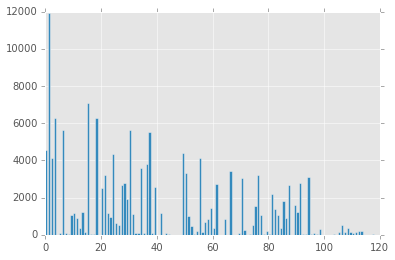

In [98]:
hla_type=hum_data.groupby('mhc',as_index=False).count()['mhc']
hla_type_c=hum_data.groupby('mhc',as_index=False).count()['species']
plt.bar(range(len(hla_type_c)),hla_type_c)

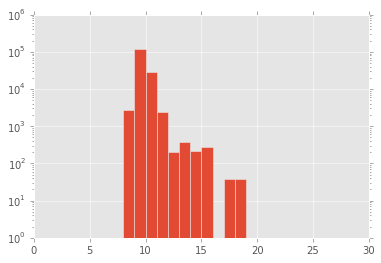

In [74]:
dump=plt.hist(hum_data.peptide_length.values,bins=range(0,max(hum_data.peptide_length)),log=True)

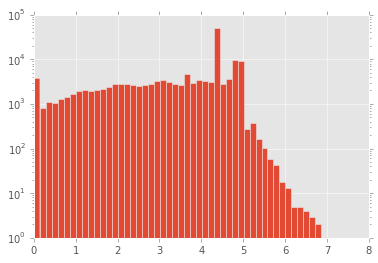

In [62]:
dump=plt.hist(np.log10(hum_data.meas.values),bins=50,log=True)

In [109]:
hum_data.groupby('cv',as_index=False).count()[['cv','meas']]

,cv,meas
0,TBD,151933


In [110]:
hum_data.groupby('inequality',as_index=False).count()[['inequality','meas']]

,inequality,meas
0,<,1523
1,=,83751
2,>,66659


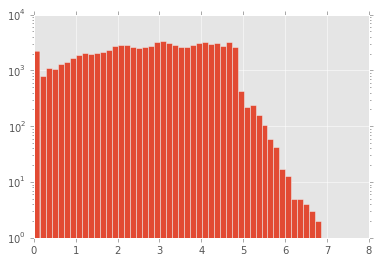

In [115]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='='].meas.values),bins=50,log=True)

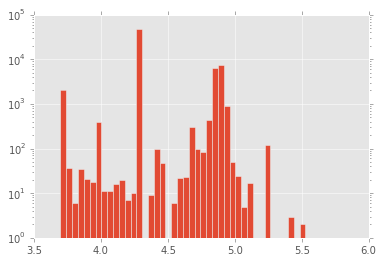

In [116]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='>'].meas.values),bins=50,log=True)

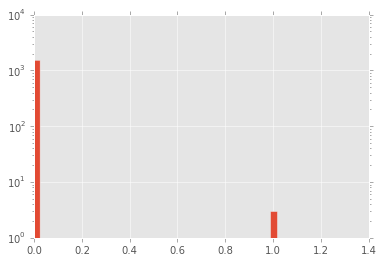

In [117]:
dump=plt.hist(np.log10(hum_data[hum_data.inequality=='<'].meas.values),bins=50,log=True)

---
# Test

In [125]:
%%bash
#wget http://tools.iedb.org/auto_bench/mhci/weekly/accumulated/2015-08-07/predictions
cat  predictions  | awk '{if($4==9 && $5=="ic50") print}' > predictions_2015-08-07_L9_ic50.dat

In [126]:
test_2015_08_07_L9_ic50 = pd.read_csv('predictions_2015-08-07_L9_ic50.dat',\
    sep='\t', names=['Date','IEDB reference','Allele','Peptide length','Measurement type',\
    'Peptide seq','Measurement value','NetMHCpan','SMM','ANN','ARB','SMMPMBEC','IEDB Consensus','NetMHCcons','PickPocket'])
test_2015_08_07_L9_ic50.head()

,Date,IEDB reference,Allele,Peptide length,Measurement type,Peptide seq,Measurement value,NetMHCpan,SMM,ANN,ARB,SMMPMBEC,IEDB Consensus,NetMHCcons,PickPocket
0,2015-07-17,1029061,HLA-B*57:01,9,ic50,VTTDIQVKV,2000,15662.29,9158.41,13178,10239.67,5937.59,10.0,14407.49,2607.06
1,2015-07-17,1029061,HLA-B*57:01,9,ic50,HSITYLLPV,700,4494.76,4839.72,7404,2815.61,4738.16,5.6,5743.49,1097.07
2,2015-07-17,1029061,HLA-B*57:01,9,ic50,RVAGIHKKV,70000,13537.58,6106.89,13780,20030.03,3869.10,8.35,13648.77,2904.96
3,2015-07-17,1029061,HLA-B*57:01,9,ic50,PYIACRTSI,10000,31999.43,169753.99,22048,49753.37,188195.83,44.5,26550.96,43911.91
4,2015-07-17,1029061,HLA-B*57:01,9,ic50,MYGLKGPDI,50000,34886.61,232712.65,19828,61728.04,340102.64,41.0,26407.71,26123.53


In [131]:
test_2015_08_07_L9_ic50.groupby(['Allele'],as_index=False).count()[['Allele','SMM']]

,Allele,SMM
0,H-2-Kb,10
1,HLA-A*02:01,55
2,HLA-A*02:02,55
3,HLA-A*02:03,55
4,HLA-A*02:06,55
5,HLA-A*68:02,55
6,HLA-B*57:01,26


(array([ 13.,  12.,  40.,  46.,  40.,  33.,  36.,  23.,  30.,  38.]),
 array([-1.22184875, -0.61515407, -0.00845939,  0.59823529,  1.20492997,
         1.81162465,  2.41831932,  3.025014  ,  3.63170868,  4.23840336,
         4.84509804]),
 <a list of 10 Patch objects>)

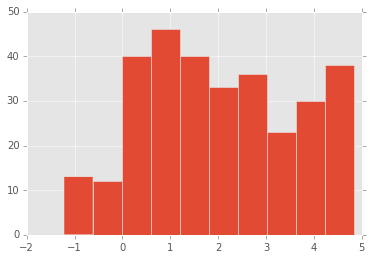

In [133]:
plt.hist(np.log10(test_2015_08_07_L9_ic50['Measurement value']))